In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Bước 1: Import bibrary

In [96]:
# import library
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # thư viện để hoàn thiện mạng ANN
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

Bước 2: Chuẩn bị data

In [97]:
data = load_iris()

In [98]:
data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [99]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [100]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)

In [101]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

In [102]:
y_train.shape, y_test.shape

((105,), (45,))

Bước 3: Khai báo cấu trúc ANN

In [125]:
# Build the model.
model = Sequential([
  Dense(16, activation='relu', input_shape=(4,)),
  Dense(16, activation='relu'),
  Dense(16, activation='relu'),
  Dense(16, activation='relu'),
  Dense(16, activation='relu'),
  Dense(3, activation='softmax'),
])

In [111]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 24)                120       
                                                                 
 dense_49 (Dense)            (None, 24)                600       
                                                                 
 dense_50 (Dense)            (None, 24)                600       
                                                                 
 dense_51 (Dense)            (None, 24)                600       
                                                                 
 dense_52 (Dense)            (None, 24)                600       
                                                                 
 dense_53 (Dense)            (None, 3)                 75        
                                                                 
Total params: 2,595
Trainable params: 2,595
Non-traina

Bước 4: Compile the model and Train ANN

In [126]:
# Compile the model 
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy'],
)

In [127]:
history=model.fit(
    X_train, 
    to_categorical(y_train),
    epochs=120,
    batch_size=32
)

Epoch 1/120
4/4 [==============================] - 0s 3ms/step - loss: 1.4685 - accuracy: 0.3333
Epoch 2/120
4/4 [==============================] - 0s 2ms/step - loss: 1.2915 - accuracy: 0.4571
Epoch 3/120
4/4 [==============================] - 0s 2ms/step - loss: 1.1939 - accuracy: 0.3619
Epoch 4/120
4/4 [==============================] - 0s 2ms/step - loss: 1.1440 - accuracy: 0.3619
Epoch 5/120
4/4 [==============================] - 0s 2ms/step - loss: 1.1213 - accuracy: 0.3619
Epoch 6/120
4/4 [==============================] - 0s 2ms/step - loss: 1.1159 - accuracy: 0.3619
Epoch 7/120
4/4 [==============================] - 0s 3ms/step - loss: 1.1067 - accuracy: 0.3619
Epoch 8/120
4/4 [==============================] - 0s 2ms/step - loss: 1.0919 - accuracy: 0.3619
Epoch 9/120
4/4 [==============================] - 0s 2ms/step - loss: 1.0746 - accuracy: 0.6095
Epoch 10/120
4/4 [==============================] - 0s 4ms/step - loss: 1.0650 - accuracy: 0.6952
Epoch 11/120
4/4 [===========

In [120]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


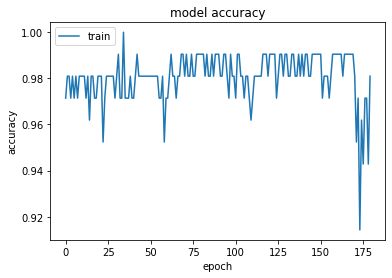

In [121]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

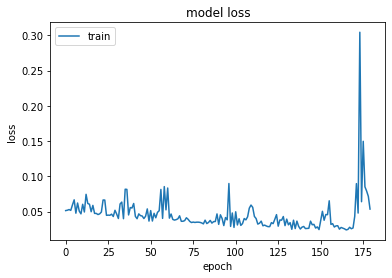

In [122]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [123]:
# độ chính xác hàm loss.
model.evaluate(
    X_test,
    to_categorical(y_test)
)

2/2 [==============================] - 0s 3ms/step - loss: 0.1945 - accuracy: 0.9556


[0.19454528391361237, 0.9555555582046509]

In [124]:
# Predict on the first 5 test images.
predictions = model.predict([(2,3,4,5)])

# Print our model's predictions.
print('Hoa này thuộc lớp số: ', np.argmax(predictions, axis=1)) 

1/1 [==============================] - 0s 59ms/step
Hoa này thuộc lớp số:  [2]


# Save model 

In [89]:
import keras
model.save('/content/drive/MyDrive/Colab Notebooks/model.gk')